In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version trains using the MNIST dataset, then tests on our own images
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot as plt
import csv
import scipy.ndimage
#from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [3]:
# helper to load data from PNG image files
import imageio

In [4]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        self.wih = numpy.load('save_wih.npy')
        self.who = numpy.load('save_who.npy')
        plt.imshow(self.wih)
        plt.show()
        plt.imshow(self.who)
        plt.show()
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T #tao mang cua mang va dao mang ([a,b]->[[a],b])
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs) # nhan 2 ma tran trong so voi ma tran dau vao de dc gia tri tai cac nut lop an
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # thuc hien ham kich hoat signoid
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs) 
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

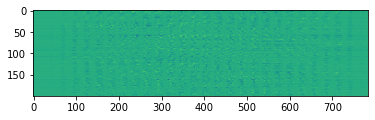

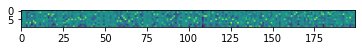

In [5]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


In [6]:
def save(self):
    numpy.save('save_wih', self.wih)
    numpy.save('save_who', self.who)
    pass

test with our own image 

In [7]:
# test the neural network with our own images

from tkinter import *
from PIL import ImageTk,Image
from tkinter import filedialog
from tkinter import messagebox
import os 

root = Tk()
root.geometry("790x465")
root.iconbitmap('icon.ico')
root.title("Handwriting number recognition")

#-----------------------------------------------------
note = Label(root, text = "NOTE: Load the picture with the first character of the file is the correct number of the picture",font = "Times" ,justify = CENTER)
note.grid(row = 0, column = 0,columnspan = 3)
input_label = Label(root, text = "INPUT",font = "Times 20" ,justify = CENTER)
input_label.grid(row = 2, column = 0)
imgb = ImageTk.PhotoImage((Image.open("some images/blank.png")).resize((250, 250), Image.ANTIALIAS))
img_blank = Label(root, image = imgb)
img_blank.grid(row = 3, column = 0)
#----------------------------------------------------
output_label = Label(root, text = "OUTPUT",font = "Times 20" ,justify = CENTER)
output_label.grid(row = 2, column = 1)
imgb1 = ImageTk.PhotoImage((Image.open("some images/blank.png")).resize((250, 250), Image.ANTIALIAS))
img_blank1 = Label(root, image = imgb1)
img_blank1.grid(row = 3, column = 1,padx = 10)
#-----------------------------------------------------
confi_label = Label(root, text = "CONFIDENCES",font = "Times 20" ,justify = CENTER)
confi_label.grid(row = 2, column = 2)
#-----------------------------------------------------
last_num = Label(root, text = "number: ???",font = "Times")
last_num.grid(row = 4, column = 1)
last_confi = Label(root, text = "confidence: ???",font = "Times")
last_confi.grid(row = 5, column = 1)
#-----------------------------------------------------
def chonanh():
    global img,imglb
    root.filename = filedialog.askopenfilename(initialdir = "my_own_images/", title = "CHOOSE AN IMAGE", filetypes = (("png file","*.png"),("all files","*.*")))
    img = ImageTk.PhotoImage((Image.open(root.filename)).resize((250, 250), Image.ANTIALIAS))
    imglb = Label(root, image = img)
    imglb.grid(row = 3, column = 0)

b = Button(root , text = "CHOOSE AN IMAGE",font = "Times 10",padx = 65,command = chonanh)
b.grid(row = 1, column = 0)
# sticky = W, columnspan = 2

def openpaint():
    os.system('c:/Windows/system32/mspaint.exe')

d = Button(root , text = "OPEN PAINT",font = "Times 10",padx = 84,command = openpaint)
d.grid(row = 1, column = 1)
#--------------------------------------------------------

#-----------------------------------------------------
def test():
    global img2,label1,label2,label_confi,outpu_img,img_array
    img_array = imageio.imread(root.filename, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    outputs = n.query(img_data)
    
    ohyeah = outputs * 100
    ohyeah = ohyeah.astype(int)
    #numpy.set_printoptions(precision=3)
    #ohyeah = numpy.around(ohyeah,3)
    #print(ohyeah)
    
    confidences = "0 - %d" %ohyeah[0] + "% "+"\n1 - %d" %ohyeah[1] + "%" +"\n2 - %d" %ohyeah[2] + "%" +"\n3 - %d" %ohyeah[3] + "%" +"\n4 - %d" %ohyeah[4] + "%" +"\n5 - %d" %ohyeah[5] + "%" +"\n6 - %d" %ohyeah[6] + "%" +"\n7 - %d" %ohyeah[7] + "%" +"\n8 - %d" %ohyeah[8] + "%" +"\n9 - %d" %ohyeah[9] + "%"
    #print(confidences)
    label_confi = Label(root,text = confidences,font = "Times 15" ,justify = LEFT)
    label_confi.grid(row = 3, column = 2)
    
    label = numpy.argmax(outputs) #tra ve gia tri lon nhat theo so hang 
    last_num.destroy()
    label1 = Label(root, text = "number: "+ str(label),font = "Times")
    label1.grid(row = 4, column = 1)
    
    maxconfi = numpy.amax(ohyeah)
    last_confi.destroy()
    label2 = Label(root, text = "confidence: " + str(maxconfi) + "%",font = "Times")
    label2.grid(row = 5, column = 1)
    
    if(label == 0):
        img2 = ImageTk.PhotoImage((Image.open("some images/0.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1)
        
    elif (label == 1):
        img2 = ImageTk.PhotoImage((Image.open("some images/1.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 2):
        img2 = ImageTk.PhotoImage((Image.open("some images/2.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 3):
        img2 = ImageTk.PhotoImage((Image.open("some images/3.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 4):
        img2 = ImageTk.PhotoImage((Image.open("some images/4.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 5):
        img2 = ImageTk.PhotoImage((Image.open("some images/5.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 6):
        img2 = ImageTk.PhotoImage((Image.open("some images/6.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 7):
        img2 = ImageTk.PhotoImage((Image.open("some images/7.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 8):
        img2 = ImageTk.PhotoImage((Image.open("some images/8.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
        
    elif (label == 9):
        img2 = ImageTk.PhotoImage((Image.open("some images/9.jpg")).resize((250, 250), Image.ANTIALIAS))
        outpu_img = Label(root, image = img2)
        outpu_img.grid(row = 3, column = 1,padx = 10)
    
    if (label != int((root.filename)[73:74])):
        addbt["state"] = NORMAL
        MESSAGE = messagebox.showerror("ERROR !!!", "Wrong identification!\nPlease type the target to update the mnist_train and train the machine against")
    
    a["state"] = DISABLED
    b["state"] = DISABLED
    pass    

a = Button(root, text = "RECOGNIZE",font = "Times 10",padx = 88,command = test)
a.grid(row = 4, column = 0)


#----------------------------------------------------------
def xoa():
    global last_num,last_confi
    label_confi.destroy()
    
    label1.destroy()
    last_num = Label(root, text = "number: ???",font = "Times")
    last_num.grid(row = 4, column = 1)
    
    label2.destroy()
    last_confi = Label(root, text = "confidence: ???",font = "Times")
    last_confi.grid(row = 5, column = 1)
    e.delete(0, END)
    imglb.destroy()
    outpu_img.destroy()
    a["state"] = NORMAL
    b["state"] = NORMAL
    addbt["state"] = DISABLED
    trainbt["state"] = DISABLED
    pass
    
c = Button(root, text = "CLEAR",font = "Times 10",padx = 102, command = xoa)
c.grid(row = 5, column = 0)


#-------------------------------------------------------
frame = LabelFrame(root,text = "Type the target to train",font = "Times")
frame.grid(row = 6, column = 0)
labelentry = Label(frame, text = "Target: ",font = "Times")
labelentry.grid(row = 0, column = 0)
e = Entry(frame, width = 25)
e.grid(row = 0, column = 1)
def add():
    img_data = (255.0 - img_array.reshape(784)).astype(int)
    label = int(e.get())
    record = numpy.append(label,img_data)
    with open("mnist_dataset/mnist_train.csv", "a", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(record)
    trainbt["state"] = NORMAL
addbt = Button(frame, text = "ADD",font = "Times 10", command = add)
addbt.grid(row = 0, column = 2)
addbt["state"] = DISABLED

def train():
    training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()
    epochs = 10
    for e in range(epochs):
        # split the record by the ',' commas
        all_values = training_data_list[-1].split(',') # chia chuoi thanh 1 chuoi loai bo dau ,
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # quy mo dau vao pham vi 0,01 den 1
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01 # tao ra 1 mang 0.01 (mang nay dien ta dau ra)
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99 # gan gia tri o thu all_values[0] - label cua mang dau ra la 0.99 tu la 
        n.train(inputs, targets)
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
    save(n)
    
    
trainbt = Button(frame, text = "TRAIN",font = "Times 10", command = train)
trainbt.grid(row = 0, column = 3)
trainbt["state"] = DISABLED

def train_with_mnist():
    training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()
    
    epochs = 10

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',') # chia chuoi thanh 1 chuoi loai bo dau ,
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 # quy mo dau vao pham vi 0,01 den 1
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01 # tao ra 1 mang 0.01 (mang nay dien ta dau ra)
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99 # gan gia tri o thu all_values[0] - label cua mang dau ra la 0.99 tu la 
            n.train(inputs, targets)
            ## create rotated variations
            # rotated anticlockwise by x degrees
            inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
            n.train(inputs_plusx_img.reshape(784), targets)
            # rotated clockwise by x degrees
            inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
            n.train(inputs_minusx_img.reshape(784), targets)
            pass
        pass
    save(n)

buttontrain = Button(root,text = "TRAIN",font = "Times 10", command = train_with_mnist)
buttontrain.grid(row = 6, column = 2)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\daitr\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-7-a5d4fb8ef0ca>", line 134, in test
    if (label != int((root.filename)[73:74])):
ValueError: invalid literal for int() with base 10: ''
